In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np

In [2]:
gang = pd.read_csv('../data/data_big_sep2015/gang_data.csv')
gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])
slurm = pd.read_csv('../data/data_big_sep2015/slurm_data.csv',error_bad_lines=True,header=None)
slurm[1]=pd.to_datetime(slurm[1])
slurm[2]=pd.to_datetime(slurm[2])
slurm[3]=pd.to_timedelta(slurm[3],coerce=True)

In [29]:
strt = 33
todo = 700
sm = [];
n = 0
for index in range(strt,strt+todo):
    
    pick = 'midway'+str(index).zfill(3)
    sub = pick+'|Timestamp'  
    subgang = gang.filter(regex=sub)
    subgang.columns=["".join(col.lstrip(pick).split()) for col in subgang.columns]
    subslurm = slurm[slurm[0]==pick]
    
    if('domain_a_avgpwr' in subgang):
        tt = subslurm[1].dt.hour
        sm .extend( list(tt.values))
        n = n+1
s = np.array(sm)


(array([ 10868.,   8456.,   7216.,   6030.,   4201.,   3708.,   4348.,
          4791.,   7313.,   7533.,  10125.,  11984.,  13534.,  13691.,
         16311.,  18256.,  19274.,  16569.,  13196.,  13747.,  15270.,
         11590.,  13231.,  14368.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

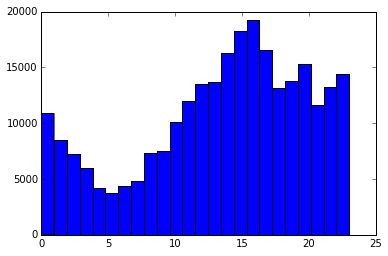

In [30]:
plt.hist(s,24)